In [1]:
from os import listdir, mkdir
from os.path import isfile, join, isdir
from json import loads
from re import findall,UNICODE
import sys
sys.path.append("/Users/andyreagan/tools/python")
from kitchentable.dogtoys import *
from labMTsimple.labMTsimple.speedy import LabMT
my_LabMT = LabMT()
from labMTsimple.labMTsimple.storyLab import *
import numpy as np
from database.bookclass import Book_raw_data
import pickle

import os
sys.path.append('/Users/andyreagan/projects/2014/09-books/database')
os.environ.setdefault('DJANGO_SETTINGS_MODULE','gutenbergdb.settings')
import django
django.setup()

from library.models import *

from tqdm import tqdm

loading labMT with stopVal=0.0, for 10222 words


In [2]:
# all our essentials
from matplotlib import rc,rcParams
rc('font', family='sans-serif') 
rc('font', serif='Helvetica Neue')
rc('text', usetex='false')

rc('font', family='serif')
rc('font', family='cmr10')
rc('text', usetex='true')
# this should accomplish the same thing
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage{hyperref}'
rcParams['text.latex.unicode'] = True

rcParams.update({'font.size': 12})
import matplotlib.pyplot as plt
%matplotlib inline

# import matplotlib
# matplotlib.use("pgf")
# pgf_with_custom_preamble = {
#     "text.usetex": True,
#     "text.latex.unicode": True,
#     "pgf.preamble": [
#         r"\usepackage{hyperref}"
#         ]
# }
# matplotlib.rcParams.update(pgf_with_custom_preamble)
# matplotlib.rcParams.update({'font.size': 12})
# from matplotlib import pyplot as plt

In [3]:
filters = {"min_dl":20,
           "length": [20000,100000],
           "P": True,
           "n_points": 200,
           "salad": True,
          }
q = Book.objects.filter(exclude=False,length__gt=10000,length__lte=200000,
                        downloads__gte=150,numUniqWords__gt=1000,numUniqWords__lt=18000,lang_code_id=0)
q = Book.objects.filter(exclude=False,length__gt=filters["length"][0],length__lte=filters["length"][1],
                        downloads__gte=filters["min_dl"],lang_code_id=0,locc_with_P=filters["P"])
print(len(q))

2590


In [4]:
a = q[0]

In [5]:
a

<Book: Alice's Adventures in Wonderland>

In [6]:
a.txt_file_path

'data/gutenberg/gutenberg-007/11.txt'

In [7]:
f = open(a.txt_file_path,"r")
raw_text = f.read()
f.close()

In [8]:
lines = raw_text.split("\n")

In [9]:
lines[:10]

["\ufeffProject Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll",
 '',
 'This eBook is for the use of anyone anywhere at no cost and with',
 'almost no restrictions whatsoever.  You may copy it, give it away or',
 're-use it under the terms of the Project Gutenberg License included',
 'with this eBook or online at www.gutenberg.org',
 '',
 '',
 "Title: Alice's Adventures in Wonderland",
 '']

In [10]:
for line in lines:
    if "***" in line:
        print(line)
    if "START" in line and "***" in line:
        print(line)
    if "END" in line and "***" in line:
        print(line)

*** START OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***
*** START OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***
*** END OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***
*** END OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***
***** This file should be named 11.txt or 11.zip *****
*** START: FULL LICENSE ***
*** START: FULL LICENSE ***


In [11]:
annotation_count = np.zeros(len(q))
start_book = np.zeros(len(q))
end_book = np.zeros(len(q))
for i,b in tqdm(enumerate(q)):
    f = open(b.txt_file_path,"r")
    raw_text = f.read()
    f.close()
    lines = raw_text.split("\n")
    for line in lines:
        if "***" in line:
            annotation_count[i] += 1
        if "START" in line and "***" in line:
            start_book[i] += 1
        if "END" in line and "***" in line:
            end_book[i] += 1

2590it [00:16, 159.78it/s]


In [12]:
annotation_count.mean()

4.2675675675675677

(array([  2.00000000e+01,   5.70000000e+01,   2.23100000e+03,
          1.74000000e+02,   0.00000000e+00,   4.70000000e+01,
          8.00000000e+00,   6.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   2.70000000e+01,   3.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          4.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

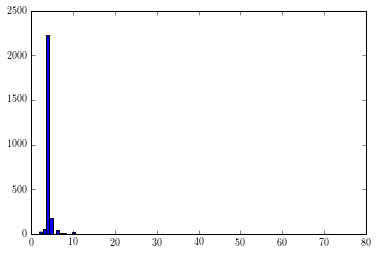

In [13]:
plt.hist(annotation_count,bins=100)

In [14]:
start_book.mean(0)

1.9262548262548262

(array([  2.90000000e+01,   1.35000000e+02,   2.42400000e+03,
          2.00000000e+00]),
 array([0, 1, 2, 3, 4]),
 <a list of 4 Patch objects>)

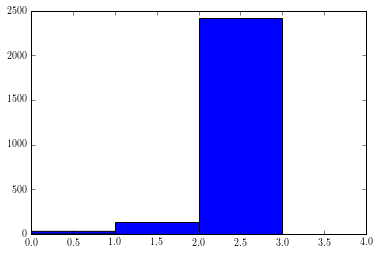

In [15]:
plt.hist(start_book,bins=[0,1,2,3,4])

In [16]:
annotation_count.argmax()

216

In [17]:
q[109]

<Book: The Country of the Pointed Firs>

In [18]:
q[109].gutenberg_id

367

In [19]:
annotation_count.max()

80.0

In [20]:
len(start_book>0)/len(start_book)*100

100.0

In [21]:
len(end_book>0)/len(start_book)*100

100.0

In [22]:
# so they all have this...

In [100]:
annotation_count = np.zeros(len(q))
start_book = np.zeros(len(q))
end_book = np.zeros(len(q))
start_book_i = np.zeros(len(q))
end_book_i = np.zeros(len(q))
for i,b in tqdm(enumerate(q)):
    f = open(b.txt_file_path,"r")
    raw_text = f.read()
    f.close()
    lines = raw_text.split("\n")
    # pass 1, this format is easy and gets 78.9% of books
    for j,line in enumerate(lines):
        if "***" == line[:3]:
            annotation_count[i] += 1
        if "START OF THIS PROJECT GUTENBERG EBOOK" in line or "START OF THE PROJECT GUTENBERG EBOOK" in line:
        # and "***" in line and start_book[i] == 0 and j<.25*len(lines): 
            start_book[i] = j/float(len(lines))
            start_book_i[i] = j
        if "END OF THIS PROJECT GUTENBERG EBOOK" in line or "END OF THE PROJECT GUTENBERG EBOOK" in line:
        #  and "***" in line and j>.75*len(lines)
            end_book[i] = j/float(len(lines))
            end_book_i[i] = j
    if start_book[i]>0.0 and end_book[i]>0.0:
        next
    # print("simple format not present")
    for j,line in enumerate(lines):
        if "END" in line and  "SMALL PRINT" in line and j<.5*len(lines):
            start_book[i] = j/float(len(lines))
            start_book_i[i] = j
        if "end" in line.lower() and "project gutenberg" in line.lower() and j>.75*len(lines):
            end_book[i] = j/float(len(lines))
            end_book_i[i] = j
    if end_book[i] == 0.0:
        for j,line in enumerate(lines):
            if "THE END" in line and j>.9*len(lines):
                end_book[i] = j/float(len(lines))
                end_book_i[i] = j
    # got 98.95%...
    if end_book[i] == 0.0:
        end_book[i] = 1.0
        end_book_i[i] = len(lines)-1

2590it [00:20, 125.58it/s]


In [101]:
print(len(start_book[start_book>0.0])/len(start_book)*100)
print(len(end_book[end_book>0.0])/len(end_book)*100)

98.8030888030888
100.0


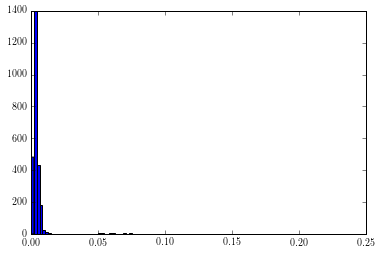

In [102]:
a = plt.hist(start_book,bins=100)

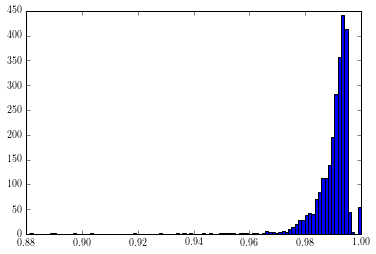

In [103]:
b = plt.hist(end_book,bins=100)

In [104]:
missing_end = np.arange(len(end_book))[end_book<.1]
for b_id in missing_end:
    print(q[int(b_id)].gutenberg_id,": ",q[int(b_id)].title)

In [105]:
missing_start = np.arange(len(start_book))[start_book==0.0]
for b_id in missing_start:
    print(q[int(b_id)].gutenberg_id,": ",q[int(b_id)].title)

1106 :  The Tragedy of Titus Andronicus
1107 :  The Taming of the Shrew
1108 :  The Two Gentlemen of Verona
1109 :  Love's Labour's Lost
1110 :  King John
1111 :  King Richard the Second
1114 :  The Merchant of Venice
1115 :  The First Part of King Henry the Fourth
1120 :  The Tragedy of Julius Caesar
1122 :  The Tragedy of Hamlet, Prince of Denmark
1123 :  Twelfth Night; Or, What You Will
1125 :  All's Well That Ends Well
1126 :  Measure for Measure
1127 :  The Tragedy of Othello, Moor of Venice
1128 :  The Tragedy of King Lear
1129 :  The Tragedy of Macbeth
1130 :  The Tragedy of Antony and Cleopatra
1133 :  Cymbeline
1776 :  King Richard II
1777 :  Romeo and Juliet
1779 :  The Merchant of Venice
1782 :  King Henry IV, Part 2
1785 :  Julius Caesar
1787 :  Hamlet
1790 :  Troilus and Cressida
1791 :  All's Well That Ends Well
1793 :  Othello
1794 :  King Lear
1795 :  Macbeth
4682 :  Nonsense Novels
4715 :  An African Millionaire: Episodes in the Life of the Illustrious Colonel Clay


# the new pipeline for gutenberg text
let's just set it up

In [147]:
def get_maintext_lines(book):
    f = open(book.txt_file_path,"r")
    raw_text = f.read()
    f.close()
    lines = raw_text.split("\n")
    start_book_i = 0
    end_book_i = len(lines)-1
    # pass 1, this format is easy and gets 78.9% of books
    for j,line in enumerate(lines):
        if "START OF THIS PROJECT GUTENBERG EBOOK" in line or "START OF THE PROJECT GUTENBERG EBOOK" in line:
        # and "***" in line and start_book[i] == 0 and j<.25*len(lines): 
            start_book_i = j
        if ("END OF THIS PROJECT GUTENBERG EBOOK" in line or "END OF THE PROJECT GUTENBERG EBOOK" in line or "END OF PROJECT GUTENBERG" in line.upper()) and (end_book_i == (len(lines)-1)):
        #  and "***" in line and j>.75*len(lines)
            end_book_i = j
    if (start_book_i == 0) and (end_book_i == len(lines)-1):
        for j,line in enumerate(lines):
            if "END" in line and  "SMALL PRINT" in line and j<.5*len(lines):
                start_book_i = j
            if "end" in line.lower() and "project gutenberg" in line.lower() and j>.75*len(lines):
                end_book_i = j
        if end_book_i == len(lines)-1:
            for j,line in enumerate(lines):
                if "THE END" in line and j>.9*len(lines):
                    end_book_i = j
    return lines[(start_book_i+1):(end_book_i)]

In [181]:
def get_chunks(lines):
    # put them back together...
    raw_text = "\n".join(lines)
    # remove extra whitespace
    raw_text_1 = re.sub("\n[\\s]+?\n","\n\n",raw_text)
    # remove singleton newlines
    raw_text_2 = re.sub(r"([^\n])\n([^\n])",r"\1 \2",raw_text_1)
    raw_text_3 = raw_text_2.rstrip().lstrip()

    # three levels of significance
    # single newlines were already discarded (insignificant)
    # double newlines are real line breaks
    # triple newlines (or more) separate content

    # split on those triples (or more)
    big_chunks = re.split("\n\n\n+",raw_text_3)

    # now break them into the paragraphs
    small_chunks = list(map(lambda x: re.split("\n\n",x),big_chunks))
    # combined_chunks = []
    # [combined_chunks.extend(el) for el in small_chunks]
    combined_chunks = []
    for i in range(len(small_chunks)):
        for j in range(len(small_chunks[i])):
            combined_chunks.append((i,j,small_chunks[i][j]))
    return combined_chunks

In [182]:
def replace_honorifics(s):
    honorifics = ["Mr","Master","Miss","Ms","Mrs","Mx",
              "Sir","Madame","Dame","Lord","Lady","Esq","Adv",
              "Dr","Prof",
              "Rev","Fr","Pr","Br","Sr","Elder","Rabbo"]
    abbreviations = ["J.R.R"] # ,"Ph.D","M.S"] # <- could end a sentence...
    for h in honorifics+abbreviations:
        s = re.sub(h+"\\.",h,s)
    return s
sentence_re = re.compile('[\\s\n]*(.+?[\\.!?]+["’]*(?=\\s+[A-Z"’‘]|$))',flags=re.DOTALL)
def find_sentences(s):
    return sentence_re.findall(replace_honorifics(s))

## now let's test out the pipeline...

In [200]:
b = q[0]
lines = get_maintext_lines(b)
combined_chunks = get_chunks(lines)
combined_chunk_sentences = []
_ = [combined_chunk_sentences.extend([[x[0],x[1],j,y] for j,y in enumerate(find_sentences(x[2]))]) for x in combined_chunks]

In [201]:
len(lines)

3354

In [202]:
f = open(b.txt_file_path,"r")
raw_text = f.read()
f.close()
print(len(raw_text.split("\n"))-len(lines),"lines were cut")

382 lines were cut


In [203]:
print("first chunk is",combined_chunks[0])

first chunk is (0, 0, "ALICE'S ADVENTURES IN WONDERLAND")


In [204]:
print("last chunk is",combined_chunks[-1])

last chunk is (12, 72, '              THE END')


In [229]:
print(len(combined_chunk_sentences))
for x in combined_chunk_sentences[0:20]:
    print(x)

782
[1, 0, 0, 'CHAPTER I.']
[1, 2, 0, 'So she was considering in her own mind (as well as she could, for the hot day made her feel very sleepy and stupid), whether the pleasure of making a daisy-chain would be worth the trouble of getting up and picking the daisies, when suddenly a White Rabbit with pink eyes ran close by her.']
[1, 3, 0, "There was nothing so VERY remarkable in that; nor did Alice think it so VERY much out of the way to hear the Rabbit say to itself, 'Oh dear!"]
[1, 3, 1, 'Oh dear!']
[1, 3, 2, "I shall be late!' (when she thought it over afterwards, it occurred to her that she ought to have wondered at this, but at the time it all seemed quite natural); but when the Rabbit actually TOOK A WATCH OUT OF ITS WAISTCOAT-POCKET, and looked at it, and then hurried on, Alice started to her feet, for it flashed across her mind that she had never before seen a rabbit with either a waistcoat-pocket, or a watch to take out of it, and burning with curiosity, she ran across the fie

### it breaks on sentences that end within dialogue...

and it missed the first sentence of the book!

this regex was improved a lot, but it still needs help.

let's see if Spacy can do better...

In [206]:
from spacy.en import English
# Model not installed. Please run 'python -m spacy.en.download' to install latest compatible model.
from spacy.parts_of_speech import NAMES

In [208]:
nlp = English()

In [230]:
combined_chunks[:10]

[(0, 0, "ALICE'S ADVENTURES IN WONDERLAND"),
 (0, 1, 'Lewis Carroll'),
 (0, 2, 'THE MILLENNIUM FULCRUM EDITION 3.0'),
 (1, 0, 'CHAPTER I. Down the Rabbit-Hole'),
 (1,
  1,
  "Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, 'and what is the use of a book,' thought Alice 'without pictures or conversations?'"),
 (1,
  2,
  'So she was considering in her own mind (as well as she could, for the hot day made her feel very sleepy and stupid), whether the pleasure of making a daisy-chain would be worth the trouble of getting up and picking the daisies, when suddenly a White Rabbit with pink eyes ran close by her.'),
 (1,
  3,
  "There was nothing so VERY remarkable in that; nor did Alice think it so VERY much out of the way to hear the Rabbit say to itself, 'Oh dear! Oh dear! I shall be late!' (when she thought it over afterw

In [220]:
doc = nlp("\n\n".join(map(lambda x: x[2],combined_chunks[:10])))

In [228]:
[[doc[s.start],s.root,doc[s.end-1]] for s in doc.sents]

[[ALICE, ADVENTURES , I. ], [Down , peeped , .], [
  , was , ! ], [Oh , Oh , ! ], [I , be , .], [
  , went , .], [
  , went , .], [
  , was , . ], [First, saw , . ], [She , managed , .]]

giving spacy the raw text is not perfect. it includes the title of the chapter in the first sentence.

so we can rely on the chunks to do a slightly improved job

problem with my regex is that it may miss things. spacy won't, but it could include too much!

In [231]:
combined_chuncks_processed = list(map(lambda x: [x[0],x[1],nlp(x[2])],combined_chunks))

In [233]:
print(combined_chunks[0])
print(combined_chuncks_processed[0])

(0, 0, "ALICE'S ADVENTURES IN WONDERLAND")
[0, 0, ALICE'S ADVENTURES IN WONDERLAND]


In [236]:
print(combined_chuncks_processed[0][2].ents)

(ALICE,)


In [238]:
print(combined_chuncks_processed[0][2].text_with_ws)

ALICE'S ADVENTURES IN WONDERLAND


In [239]:
print([token for token in combined_chuncks_processed[0][2]])

[ALICE, 'S , ADVENTURES , IN , WONDERLAND]


In [249]:
print([token for token in combined_chuncks_processed[20][2]])

[However, , , this , bottle , was , NOT , marked , ', poison, ,, ' , so , Alice , ventured , to , taste , it, , , and , finding , it , very , nice, , , (, it , had, , , in , fact, , , a , sort , of , mixed , flavour , of , cherry, -, tart, , , custard, , , pine, -, apple, , , roast , turkey, , , toffee, , , and , hot , buttered , toast, ,, ) , she , very , soon , finished , it , off, .]


In [248]:
print([token for token in combined_chuncks_processed[20][2] if not token.is_punct])

[However, this , bottle , was , NOT , marked , poison, so , Alice , ventured , to , taste , it, and , finding , it , very , nice, it , had, in , fact, a , sort , of , mixed , flavour , of , cherry, tart, custard, pine, apple, roast , turkey, toffee, and , hot , buttered , toast, she , very , soon , finished , it , off]


In [250]:
print([token.text_with_ws for token in combined_chuncks_processed[20][2] if not token.is_punct])

['However', 'this ', 'bottle ', 'was ', 'NOT ', 'marked ', 'poison', 'so ', 'Alice ', 'ventured ', 'to ', 'taste ', 'it', 'and ', 'finding ', 'it ', 'very ', 'nice', 'it ', 'had', 'in ', 'fact', 'a ', 'sort ', 'of ', 'mixed ', 'flavour ', 'of ', 'cherry', 'tart', 'custard', 'pine', 'apple', 'roast ', 'turkey', 'toffee', 'and ', 'hot ', 'buttered ', 'toast', 'she ', 'very ', 'soon ', 'finished ', 'it ', 'off']


In [241]:
a = combined_chuncks_processed[20][2][0]

In [244]:
a.pos_

'ADV'

In [245]:
str(a)

'However'

In [247]:
a.orth_

'However'

In [251]:
chunked = get_chunks(lines)

In [252]:
chunks_nlp = list(map(lambda x: [x[0],x[1],nlp(x[2])],chunked))
all_token_list = []
for chunk in chunks_nlp:
    for token in chunk[2]:
        if not token.is_punct:
            all_token_list.append(str(token)) # get token.orth_

In [253]:
all_token_list[:10]

['ALICE',
 "'S ",
 'ADVENTURES ',
 'IN ',
 'WONDERLAND',
 'Lewis ',
 'Carroll',
 'THE ',
 'MILLENNIUM ',
 'FULCRUM ']

In [387]:
all_token_list = []
for chunk in chunks_nlp:
    for token in chunk[2]:
        if (not token.is_punct) or (str(token).rstrip() in [",",";","--","-","!"]):
            all_token_list.append(str(token)) # get token.orth_

In [267]:
"".join(all_token_list[20:220])

'was beginning to get very tired of sitting by her sister on the bank, and of having nothing to doonce or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, and what is the use of a book,thought Alice without pictures or conversationsSo she was considering in her own mind as well as she could, for the hot day made her feel very sleepy and stupid, whether the pleasure of making a daisy-chain would be worth the trouble of getting up and picking the daisies, when suddenly a White Rabbit with pink eyes ran close by herThere was nothing so VERY remarkable in that; nor did Alice think it so VERY much out of the way to hear the Rabbit say to itself, Oh dear! Oh dear! I shall be late!when she thought it over afterwards, it occurred to her that she ought to have wondered at this, but at the time it all seemed quite natural; but when the Rabbit actually TOOK A WATCH OUT OF '

In [356]:
trigram_model = dict()
starts = list()
# let's iterate over sentences
for c in chunks_nlp:
    for sent in c[2].sents:
        sent_tokens = [t for t in sent if (not t.is_punct or str(t).rstrip() == ",")]
        if len(sent_tokens) < 2:
            continue
        # print(sent_tokens)
        i = 0
        starts.append((str(sent_tokens[i]).rstrip()+ " " +str(sent_tokens[i+1]).rstrip()))
        for i in range(len(sent_tokens)-2):
            bigram = (str(sent_tokens[i]).rstrip()+ " " +str(sent_tokens[i+1]).rstrip())
            nextg = str(sent_tokens[i+2]).rstrip()
            if i == len(sent_tokens)-3:
                nextg += "."
            if bigram not in trigram_model:
                trigram_model[bigram] = {nextg: 1}
            else:
                if nextg in trigram_model[bigram]:
                    trigram_model[bigram][nextg] += 1
                else:
                    trigram_model[bigram][nextg] = 1
trigram_model_flat = dict()
for bg in trigram_model:
    words = [w for w in trigram_model[bg]]
    ps = [trigram_model[bg][w] for w in words]
    trigram_model_flat[bg] = [words,np.array(ps)/np.array(ps).sum()]

In [364]:
trigram_model["Alice said"]

{'but': 1, 'nothing': 2, 'there': 1, 'to': 3, 'very': 3, 'with': 1}

In [365]:
trigram_model_flat["Alice ,"]

[['whose',
  'because',
  'jumping',
  'always',
  'or',
  'as',
  'quite',
  'in',
  'she',
  'and',
  'it',
  'they',
  'the',
  'a',
  'shall',
  'we',
  'rather',
  'Have',
  'but',
  'looking',
  'that',
  'how',
  'so',
  'thinking',
  'to',
  'with',
  'were',
  'seriously',
  'every',
  'when',
  'very',
  'timidly',
  'swallowing',
  'who',
  'Well',
  'I',
  'feeling',
  'surprised',
  'flinging'],
 array([ 0.01282051,  0.01282051,  0.01282051,  0.01282051,  0.01282051,
         0.08974359,  0.02564103,  0.03846154,  0.03846154,  0.16666667,
         0.03846154,  0.02564103,  0.01282051,  0.05128205,  0.01282051,
         0.01282051,  0.02564103,  0.01282051,  0.01282051,  0.01282051,
         0.02564103,  0.01282051,  0.01282051,  0.01282051,  0.02564103,
         0.01282051,  0.01282051,  0.01282051,  0.01282051,  0.01282051,
         0.03846154,  0.01282051,  0.01282051,  0.07692308,  0.01282051,
         0.01282051,  0.01282051,  0.01282051,  0.01282051])]

In [377]:
def gen_text(model,seeds,n_words=500):
    i = 2
    result = np.random.choice(seeds).split(" ")
    while i<n_words:
        # print(result)
        while " ".join(result[-2:]) not in trigram_model_flat:
            # result[-1] += "."
            result.extend(np.random.choice(seeds).split(" "))
        result.append(np.random.choice(trigram_model_flat[" ".join(result[-2:])][0],p=trigram_model_flat[" ".join(result[-2:])][1]))
        i+=1
    return result

In [367]:
a = gen_text(trigram_model_flat,starts)
" ".join(a)

"But then , thought Alice to herself , after all --SAID I COULD NOT SWIM-- you ca n't go , said the Dormouse began in a minute. And how odd the directions will look. It was the Rabbit 's voice along--'Catch him , I should be like , said the Mouse in the newspapers , at the top of it. The question is , said the Caterpillar. I 'd better ask HER about it. The Queen 's absence , and yet it was n't very civil of you , sooner or later. While she was considering in her life , and that 's a fact. Alice kept her waiting. I ca n't get out of the fact. As for pulling me out of the evening , beautiful Soup. This was such a rule at processions and besides , that finished the first witness , said Alice , and went stamping about , reminding her very much at first but she stopped hastily , for the rest were quite silent for a baby altogether Alice did n't think , said the Queen , who was sitting on a little worried. Sure , it 'll never go THERE again said Alice , who had been to her in such a nice lit

In [368]:
b = np.random.shuffle(all_token_list)

In [373]:
" ".join(all_token_list[:500])

"the  but  little  --but  all  the  ,  with I  flowers  that  small  a  what  the  he  could  queer ran  it  near  , and  altogether remain  A  with  somebody ,  gardeners the  thought  your  I  the  ,  door head  she  me hardly  of  is  were  said  the  - them  she  Alice  I But  one  you  nice  large  use  walked  what  anything  's  and It  many  I  ,  the  ,  execution ,  she  by  of  came  I  witness  , turned  she  upon  suddenly  took  While  , if  I  ,  hear  --well  goose mouth  , do  replied  the  of  play  would SAID  seem  ,  of  business  shrink  's  she  flower if--if  the  Hare the  so  Alice  of  ,  a  - very  the  hear  reason to  whispered  BEE it thought  by  I  large  not  ,  your  dream  on  Herald SOUP she  I  some  to  her  the  all  of  of  of  guess Perhaps  tell  to  the  answer  I-- now  nibbled  ,  must  folded  ,  going  himself  taught  centre  wo Northumbria-- hanging  can  you  a  went  a  said  ! said all  cats do before  conversation had  of  jury baby

In [374]:
len(a)

552

In [378]:
len(all_token_list)

30569

In [379]:
a = gen_text(trigram_model_flat,starts,n_words=len(all_token_list))

In [380]:
len(a)

33275

In [381]:
b = [x.rstrip(" ").rstrip(".") for x in a if not x.rstrip(" ") == ","]

In [382]:
len(b)

30461

In [390]:
" ".join(b[500:600])

"it was all about for a minute or two it 's generally a ridge or furrow in the middle being fast asleep Alice looked very anxiously into its eyes again so she began O Mouse who looked at Alice who was peeping anxiously into her head Will you said the March Hare took the hookah into its mouth open gazing up into a tidy little room with a knife it was an immense length of neck which remained some time with great emphasis looking as solemn as she fell past it And who are THESE said the sage as he"

In [389]:
"".join(all_token_list[500:600])

"fear of killing somebody, so managed to put it into one of the cupboards as she fell past itWell!thought Alice to herself, after such a fall as this, I shall think nothing of tumbling down stairs! How brave they'll all think me at home! Why, I wouldn't say anything about it, even if I fell off the top of the house!Which was very likely trueDown, down, downWould the fall NEVER come to an end! I wonder how many miles I've "